**Question 2: Can we use Entropy for thresholding? [1 pt]**<br/>
_This question examines your knowledge on probability density function (pdf) construction from gray-scale histogram,
and the use of Entropy information for mapping image intensity values into two classes: white (foreground) and
black (background)._<br/>
**Your tasks are:<br/>**
• Choose three example gray-scale images from Berkeley Segmentation Dataset (Training Images) CLICK
HERE.<br/>
• For each possible T ∈ 0, ..., L−1, compute summation of entropy A and entropy B, called total entropy=H(A)+
H(B). Note that A and B correspond to background and foreground of the image.<br/>
• Find the value of T corresponding to maximum total entropy H(T ) = H(A) + H(B).<br/>
• Plot each of three gray scale images (I) and corresponding binary images (O) on the screen (binary images
are obtained through thresholding gray-scale images at threshold level T ) .

In [3]:
import numpy as np
from PIL import Image
from pylab import *
from copy import deepcopy
import cv2
import numpy as np
from PIL import Image
from pylab import *
%matplotlib inline
import numpy as num, math
from math import pi, sqrt, exp
import matplotlib.pyplot as plt
from numpy import matrix
import matplotlib.cm as cm




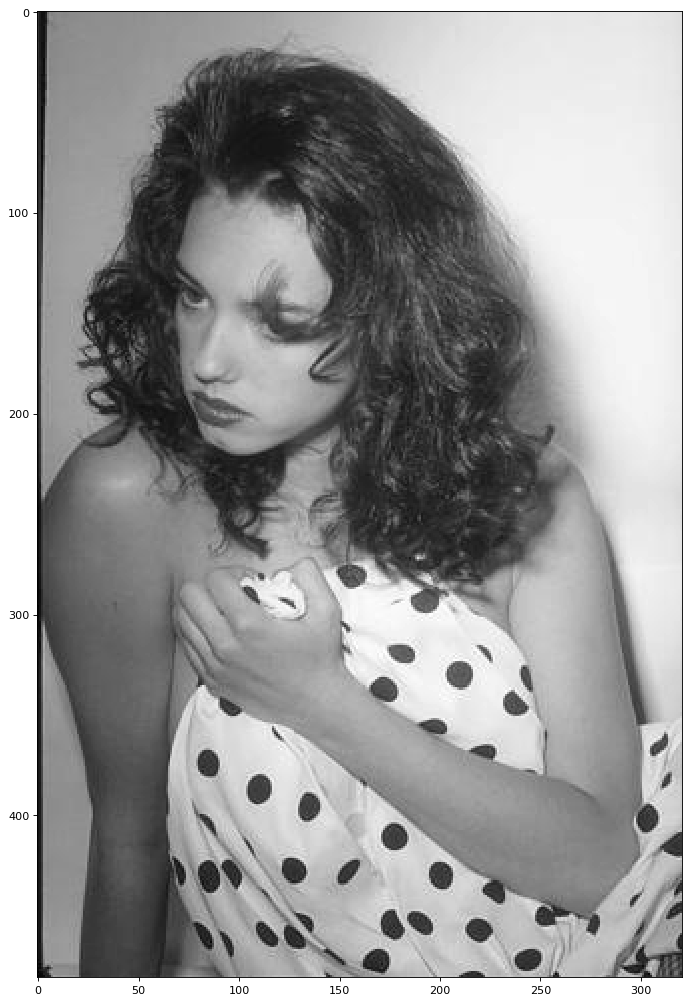

In [4]:
I1 = np.array(Image.open('/home/srikar/CVPA1/CVV/e1.jpg'))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
imshow(I1,cmap = cm.gray)

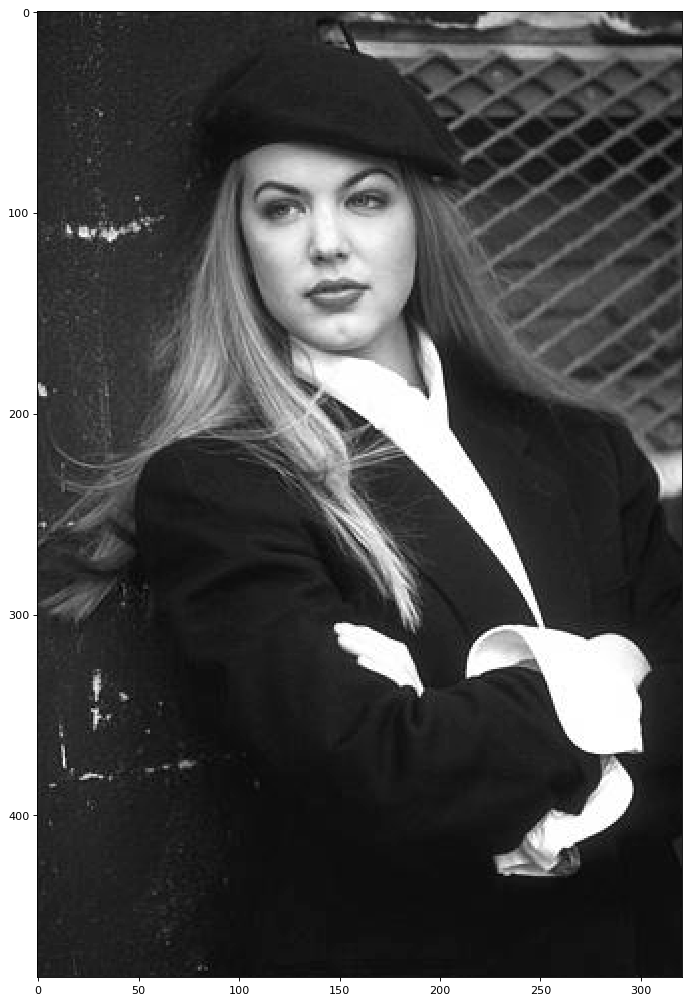

In [5]:
I2 = np.array(Image.open('/home/srikar/CVPA1/CVV/e2.jpg'))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
imshow(I2,cmap = cm.gray)

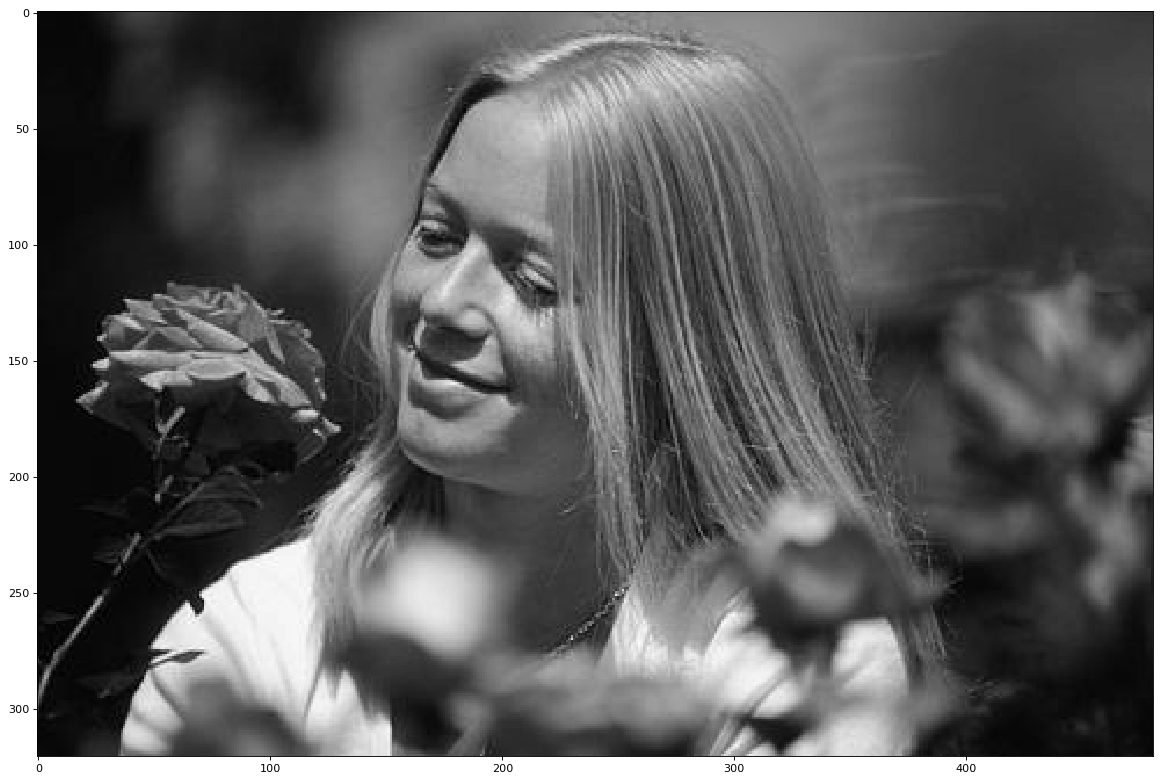

In [14]:
I3 = np.array(Image.open('/home/srikar/CVPA1/CVV/e3.jpg'))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
imshow(I3,cmap = cm.gray)

In [19]:
S = np.shape(I3)

In [20]:
S

(321, 481)

In [21]:
H = np.zeros(256)
intensity = 0

for i in range(S[0]):
    for j in range(S[1]):
        intensity = I3[i,j]
        H[intensity] = H[intensity]+1

M = np.zeros(256)
for intensity in range(256):
    M[intensity] = H[intensity]/154403
    

    


In [22]:
threshold = -1
maximum_entropy  = 0

for i in range(0, 255):
    sum_p = 0
    prob_bg = [] #background probability.
    prob_fg = [] #foreground probability.
    for j in range(0, i+1):
        sum_p = sum_p + M[j]
        

    T1 = 0 #calculating the background probability.
    for x in range(0, i+1):
        if(sum_p == 0):
            T1 = 0
        else:
            T1 = M[x]/sum_p
            prob_bg.append(T1)

    T2 = 0
    for x in range(i+1, 255):  #calculating the foreground probability.
        if(sum_p == 1):
            T2 = 0
        else:
            T2 = M[x]/(1-sum_p)
            prob_fg.append(T2)
            
    sea = 0 #entropy A
    seb = 0 #entropy B

    for x in range(0, len(prob_bg)):
        if(prob_bg[x]== 0):
            sea = sea + 0
        else:
            sea = sea + prob_bg[x]*np.log(prob_bg[x])
    
    for y in range(0, len(prob_fg)):
        if(prob_fg[y] == 0):
            seb = seb + 0
        else:
            seb = seb + prob_fg[y]*np.log(prob_fg[y])
    if(maximum_entropy < -(sea) - (seb)):
        maximum_entropy = -(sea) -(seb)
        threshold = i
    

In [23]:
print(threshold) # value of T

141


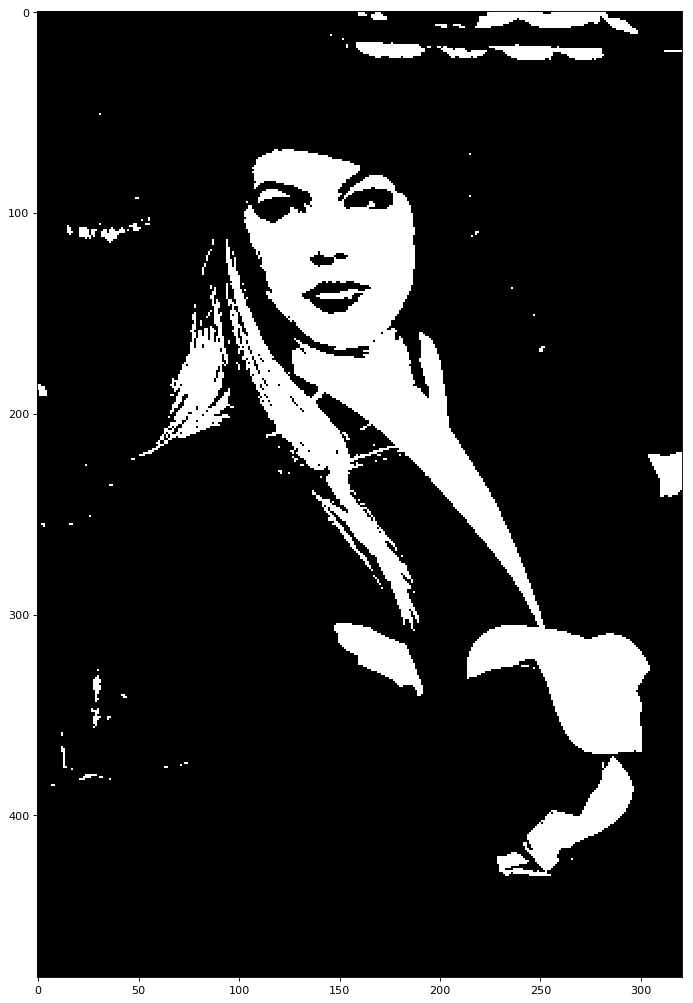

In [23]:
new1 = np.copy(I1)

for i in range(S[0]):
    for j in range(S[1]):
        if(I2[i,j] > threshold):
            new1[i,j] = 1
        else:
            new1[i,j] = 0
            
plt.figure()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(new1, cmap = cm.gray)
plt.show()

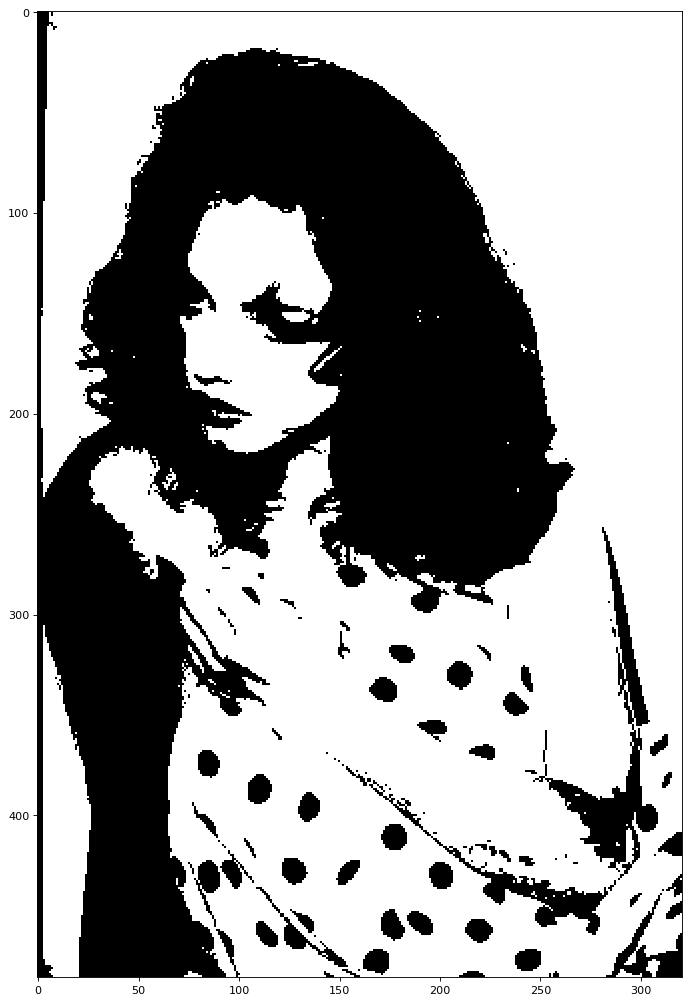

In [13]:
new2 = np.copy(I2)

for i in range(S[0]):
    for j in range(S[1]):
        if(I1[i,j] > threshold):
            new2[i,j] = 1
        else:
            new2[i,j] = 0
            
plt.figure()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(new2, cmap = cm.gray)
plt.show()

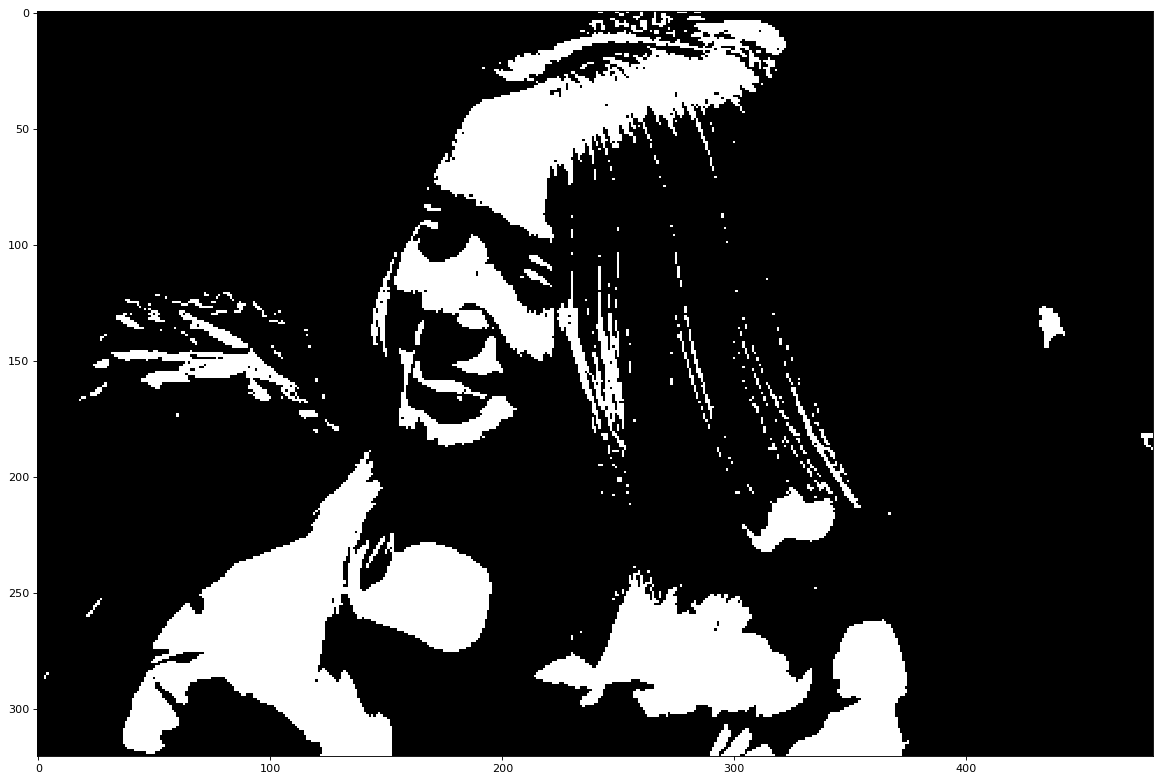

In [26]:
new3 = np.copy(I3)

for i in range(S[0]):
    for j in range(S[1]):
        if(I3[i,j] > threshold):
            new3[i,j] = 1
        else:
            new3[i,j] = 0
            
plt.figure()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(new3, cmap = cm.gray)
plt.show()